WeatherPy Analysis
     -Temperature has a strong correlation to proximity to the equator. The highest temperatures fall between -20 and 20 latitude.
     -Wind Speed seems to be pretty pretty consistent throughout all latitudes, with a handful of cities that have higher wind speed
     -Cloudiness does not seem to have a correlation with latitude

In [1]:
#Import Dependencies
import pandas as pd
import requests
import time
import numpy as np
import matplotlib.pyplot as plt
from config import api_key
from scipy.stats import linregress

#Create Output File (CSV)
output_data_file = "output_data/cities.csv"

In [2]:
#Use CityPy to generate list of cities for weather data

from citipy import citipy


#Set latitude and longitude ranges 

latitide_range = (-90, 90)
longitude_range = (-180, 180)


#Set empty lists to hold city and coordinates
coordinates = []
cities = []

#Set random latitude and longitude coordinates
lats = np.random.uniform(latitide_range[0], latitide_range[1], size=1500)
lngs = np.random.uniform(longitude_range[0], longitude_range[1], size=1500)
coordinates = zip(lats, lngs)


#Use loop to select closest city to random coordinates
for coordinates in coordinates:
    city = citipy.nearest_city(coordinates[0], coordinates[1]).city_name
    
    #Add city to city list if unique
    if city not in cities:
        cities.append(city)
        
len(cities)

626

In [3]:
#Set URL config

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

#Create partial URL with API key

query_url = f'{url}appid={api_key}&units={units}&q='


In [4]:
#Create empty lists for necessary data
city_name = []
latitude = []
longitude= []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
country = []

record = 1

print('Beginning Data Retrieval')
print('------------------------')

#Create for loop to append above lists with weather data
for city in cities:
    try:
        response = requests.get(query_url + city).json() 
        city_name.append(response['name'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temperature.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        print(f'Processing Record {record} | {city}')
        
        record = record + 1
        
        time.sleep(1.00)
    
    except Exception:
        print("City not found. Skipping...")
    continue
print('------------------------')
print('Data Retrieval Complete')
print('------------------------')

Beginning Data Retrieval
------------------------
Processing Record 1 | kodiak
Processing Record 2 | mahebourg
Processing Record 3 | mar del plata
Processing Record 4 | gomel
Processing Record 5 | hermanus
Processing Record 6 | klaksvik
Processing Record 7 | chernyshevskiy
Processing Record 8 | lata
Processing Record 9 | los llanos de aridane
Processing Record 10 | airai
Processing Record 11 | rikitea
Processing Record 12 | roanoke rapids
Processing Record 13 | qaanaaq
City not found. Skipping...
Processing Record 14 | bluff
Processing Record 15 | belmonte
Processing Record 16 | ribeira grande
Processing Record 17 | pevek
Processing Record 18 | payakumbuh
Processing Record 19 | tuktoyaktuk
Processing Record 20 | anloga
Processing Record 21 | east london
Processing Record 22 | constitucion
Processing Record 23 | puerto ayora
Processing Record 24 | kisangani
Processing Record 25 | alofi
Processing Record 26 | xining
City not found. Skipping...
Processing Record 27 | severo-kurilsk
Proces

Processing Record 231 | broken hill
Processing Record 232 | bethel
Processing Record 233 | wittlich
Processing Record 234 | coshocton
Processing Record 235 | ponta do sol
Processing Record 236 | portland
Processing Record 237 | husavik
Processing Record 238 | srandakan
Processing Record 239 | goulburn
Processing Record 240 | kedrovyy
Processing Record 241 | olinda
Processing Record 242 | norman wells
Processing Record 243 | ancud
Processing Record 244 | saint-francois
Processing Record 245 | visnes
Processing Record 246 | olafsvik
Processing Record 247 | lorengau
Processing Record 248 | tabora
Processing Record 249 | cascais
City not found. Skipping...
Processing Record 250 | dingle
Processing Record 251 | sao felix do xingu
Processing Record 252 | nikolskoye
Processing Record 253 | hasaki
Processing Record 254 | vila franca do campo
Processing Record 255 | magadan
Processing Record 256 | boa vista
Processing Record 257 | jumla
Processing Record 258 | bowen
Processing Record 259 | conw

Processing Record 467 | chenzhou
Processing Record 468 | do gonbadan
Processing Record 469 | rokytne
Processing Record 470 | brae
Processing Record 471 | port blair
Processing Record 472 | arteaga
Processing Record 473 | loandjili
Processing Record 474 | buala
City not found. Skipping...
City not found. Skipping...
Processing Record 475 | bacolod
Processing Record 476 | dalbandin
Processing Record 477 | nehe
Processing Record 478 | staryy nadym
Processing Record 479 | mingaora
Processing Record 480 | nelson bay
Processing Record 481 | abancay
Processing Record 482 | henties bay
Processing Record 483 | jadu
Processing Record 484 | turayf
Processing Record 485 | ukiah
Processing Record 486 | puri
Processing Record 487 | esperance
City not found. Skipping...
Processing Record 488 | baghdad
Processing Record 489 | havelock
Processing Record 490 | merauke
Processing Record 491 | xifeng
Processing Record 492 | port macquarie
Processing Record 493 | tessalit
Processing Record 494 | imari
Proc

In [6]:
#Create dictionary for weather DF

weather_dict={
    'City': city_name,
    'Country': country,
    'Latitude': latitude,
    'Longitude': longitude,
    'Max Temperature (F)': temperature,
    'Humidity (%)': humidity,
    'Cloudiness (%)': cloudiness,
    'Wind Speed (mph)': wind_speed}

weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv(output_data_file, index=False, header=True)
weather_df.head()

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Saint Paul Harbor,US,57.79,-152.41,41.00,56,90,6.93
1,Mahébourg,MU,-20.41,57.70,75.99,65,70,5.01
2,Mar del Plata,AR,-38.00,-57.56,51.01,81,0,4.70
3,Gomel,BY,52.43,30.98,39.20,100,3,6.71
4,Hermanus,ZA,-34.42,19.23,60.01,79,100,1.01


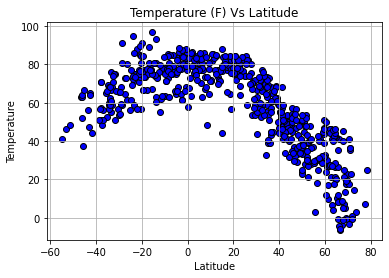

<Figure size 432x288 with 0 Axes>

In [8]:
#Create Scatterplot for Temperature (F) Vs Latitude

plt.scatter(weather_df['Latitude'], weather_df['Max Temperature (F)'], marker='o', facecolors="blue", edgecolors="black" )
plt.title('Temperature (F) Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()
plt.savefig("Output_Data/TempVsLatitude.png")

Scatterplot is comparing temperature to latitude - there appears to be a strong correlation between the two

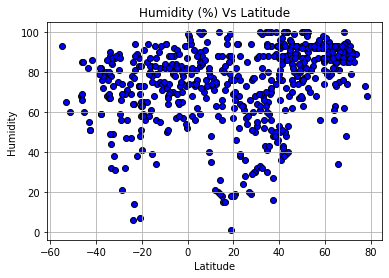

<Figure size 432x288 with 0 Axes>

In [9]:
#Create Scatterplot for Humidity (%) vs. Latitude

plt.scatter(weather_df['Latitude'], weather_df['Humidity (%)'], marker='o', facecolors="blue", edgecolors="black" )
plt.title('Humidity (%) Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)
plt.show()
plt.savefig("Output_Data/HumidityVsLatitude.png")

Scatterplot is comparing humidity to latitude - there appears to be some consistency, however there is a large cluster of cities between the latitudes of 40 and 80 that are extremely humid

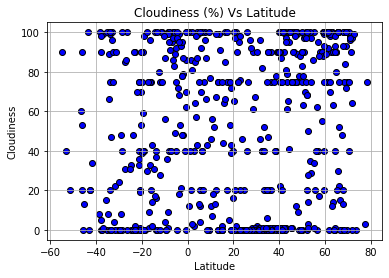

<Figure size 432x288 with 0 Axes>

In [10]:
#Create Scatterplot for Cloudiness (%) vs. Latitude

plt.scatter(weather_df['Latitude'], weather_df['Cloudiness (%)'], marker='o', facecolors="blue", edgecolors="black" )
plt.title('Cloudiness (%) Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)
plt.show()
plt.savefig("Output_Data/CloudinessVsLatitude.png")

Scatterplot is comparing cloudiness to latitude - the two do not seem to be correlated

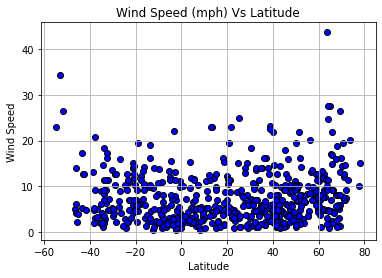

<Figure size 432x288 with 0 Axes>

In [11]:
#Create Scatterplot for Wind Speed (mph) vs. Latitude

plt.scatter(weather_df['Latitude'], weather_df['Wind Speed (mph)'], marker='o', facecolors="blue", edgecolors="black" )
plt.title('Wind Speed (mph) Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.show()
plt.savefig("Output_Data/WindSpeedVsLatitude.png")

Scatterplot is comparing wind speed to latitude - most latitudes appear to have a relatively low wind speed, however there are some cities across all latitudes that have higher wind speeds

In [12]:
#Create separate DF for Northern Hemisphere

northern_df = weather_df.loc[weather_df['Latitude'] > 0]
northern_df.head()

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Saint Paul Harbor,US,57.79,-152.41,41.00,56,90,6.93
3,Gomel,BY,52.43,30.98,39.20,100,3,6.71
5,Klaksvík,FO,62.23,-6.59,46.40,87,70,12.75
6,Chernyshevskiy,RU,63.01,112.47,6.46,91,100,11.39
7,Lata,PT,40.16,-8.33,55.00,96,0,2.19


In [13]:
#Create separate DF for Southern Hemisphere
southern_df = weather_df.loc[weather_df['Latitude'] < 0]
southern_df.head()

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
1,Mahébourg,MU,-20.41,57.70,75.99,65,70,5.01
2,Mar del Plata,AR,-38.00,-57.56,51.01,81,0,4.70
4,Hermanus,ZA,-34.42,19.23,60.01,79,100,1.01
9,Airai,TL,-8.93,125.41,78.48,50,36,4.50
10,Rikitea,PF,-23.12,-134.97,74.91,81,90,10.96


The r-value is: -0.8722645350235482


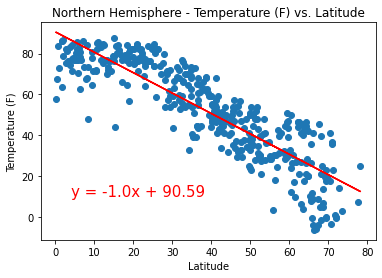

<Figure size 432x288 with 0 Axes>

In [15]:
#Create Linear Regression for Northern Hemisphere - Temperature (F) vs. Latitude

x_values = northern_df['Latitude']
y_values = northern_df['Max Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("Output_Data/NorthTempVsLat.png")

Scatterplot compares max temperature of the northern hemisphere to latitude - temperature decreases as latitude increases

The r-value is: 0.6093358615592226


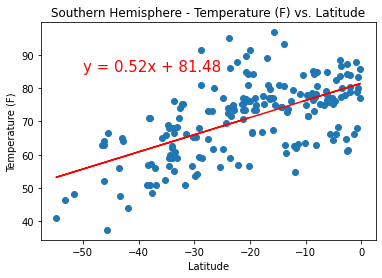

<Figure size 432x288 with 0 Axes>

In [17]:
#Create Linear Regression for Southern Hemisphere - Temperature (F) vs. Latitude

x_values = southern_df['Latitude']
y_values = southern_df['Max Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.title('Southern Hemisphere - Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("Output_Data/SouthTempVsLat.png")

Scatterplot compares max temperature of the southern hemisphere to latitude - temperature decreases as latitude decreases

The r-value is: 0.2910754393951313


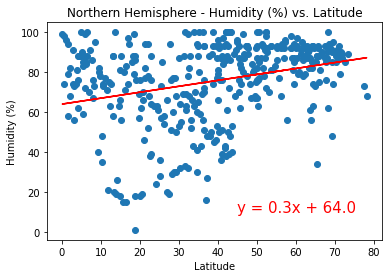

<Figure size 432x288 with 0 Axes>

In [18]:
#Create Linear Regression for Northern Hemisphere - Humidity (%) vs. Latitude

x_values = northern_df['Latitude']
y_values = northern_df['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("Output_Data/NorthHumidityVsLat.png")

Scatterplot compares humidity temperature of the northern hemisphere to latitude - overall the northern hemisphere has medium to high humidity but there does not seem to be a strong correlation to latitude.

The r-value is: 0.12631724852910065


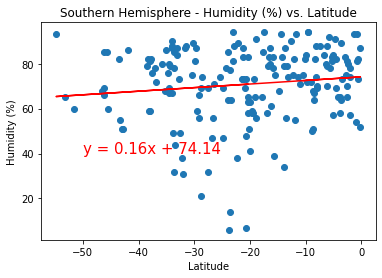

<Figure size 432x288 with 0 Axes>

In [19]:
#Create Linear Regression for Southern Hemisphere - Humidity (%) vs. Latitude

x_values = southern_df['Latitude']
y_values = southern_df['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("Output_Data/SouthHumidityVsLat.png")

Scatterplot compares humidity of the southern hemisphere to latitude - once again little relationship between latitude and humidity

The r-value is: 0.1873624654152495


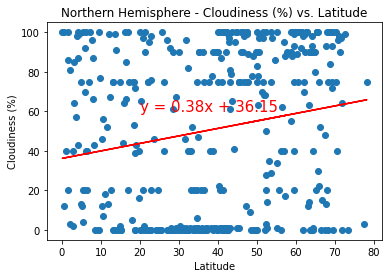

<Figure size 432x288 with 0 Axes>

In [20]:
#Create Linear Regression for Northern Hemisphere - Cloudiness (%) vs. Latitude

x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20, 60),fontsize=15,color="red")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("Output_Data/NorthCloudinessVsLat.png")

Scatterplot compares cloudiness of the northern hemisphere to latitude - very weak relationship between the two

The r-value is: 0.22483606933174788


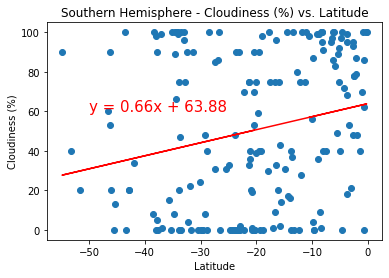

<Figure size 432x288 with 0 Axes>

In [21]:
#Create Linear Regression for Southern Hemisphere - Cloudiness (%) vs. Latitude

x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("Output_Data/SouthCloudinessVsLat.png")

Scatterplot compares cloudiness of the southern hemisphere to latitude - slightly higher relationship than northern hemisphere but still not significant

The r-value is: 0.2196971958025067


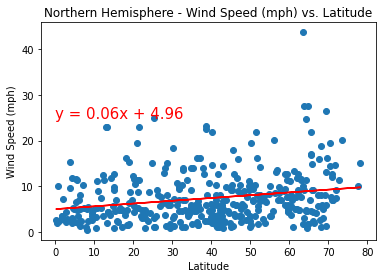

<Figure size 432x288 with 0 Axes>

In [22]:
#Create Linear Regression for Northern Hemisphere - Wind Speed (mph) vs. Latitude

x_values = northern_df['Latitude']
y_values = northern_df['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0, 25),fontsize=15,color="red")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("Output_Data/NorthWindSpeedVsLat.png")

Scatterplot compares windspeed of the northern hemisphere to latitude - very little relationship between the two

The r-value is: -0.27624998386424565


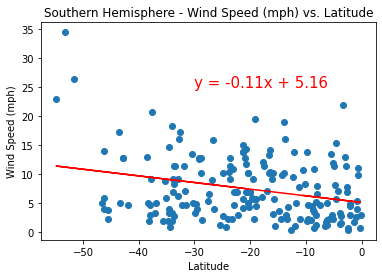

<Figure size 432x288 with 0 Axes>

In [24]:
#Create Linear Regression for Southern Hemisphere - Wind Speed (mph) vs. Latitude

x_values = southern_df['Latitude']
y_values = southern_df['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("Output_Data/SouthWindSpeedVsLat.png")

Scatterplot compares windspeed of the southern hemisphere to latitude - once again little relationship between latitude and windspeed